In [20]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics
import itertools
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv(r'C:\Users\Mahe\Desktop\Wildfire-Predictor\final.csv')
df=df.drop(columns=['Unnamed: 0'])
df.head()

,date,lat,lon,mask,lst,lstn,ndvi,vcr,prec,ma_cat
0,2019-06-02,39.737500,-122.295833,9.0,310.26000,290.921693,0.3108,0.59,0.718065,1
1,2019-06-10,39.737500,-122.295833,5.0,323.92000,290.921693,0.2526,0.59,0.000000,0
2,2019-06-18,39.737500,-122.295833,5.0,309.33877,297.900000,0.2526,0.59,0.000000,0
3,2019-06-02,39.729167,-122.295833,9.0,310.36000,290.921693,0.3198,0.57,0.718065,1
4,2019-06-10,39.729167,-122.295833,5.0,321.90000,290.921693,0.2670,0.57,0.000000,0


In [3]:
df['ma_cat'].value_counts()

0    1796
1     109
Name: ma_cat, dtype: int64

In [4]:
X = df[['vcr', 'lst','ndvi','lstn','prec']] .values  #.astype(float)
x=df[['vcr', 'lst','ndvi','lstn','prec']]
X[0:5]

array([[5.90000000e-01, 3.10260000e+02, 3.10800000e-01, 2.90921693e+02,
        7.18065143e-01],
       [5.90000000e-01, 3.23920000e+02, 2.52600000e-01, 2.90921693e+02,
        0.00000000e+00],
       [5.90000000e-01, 3.09338770e+02, 2.52600000e-01, 2.97900000e+02,
        0.00000000e+00],
       [5.70000000e-01, 3.10360000e+02, 3.19800000e-01, 2.90921693e+02,
        7.18065143e-01],
       [5.70000000e-01, 3.21900000e+02, 2.67000000e-01, 2.90921693e+02,
        0.00000000e+00]])

In [5]:
y = df['ma_cat'].values
y[0:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [6]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-3.63030991e-01,  1.63890259e-01, -7.74358640e-01,
        -1.65104665e-14,  2.65105499e+00],
       [-3.63030991e-01,  2.59405503e+00, -1.12630579e+00,
        -1.65104665e-14, -5.90206435e-01],
       [-3.63030991e-01, -3.03379665e-14, -1.12630579e+00,
         2.02688551e+00, -5.90206435e-01],
       [-4.71069833e-01,  1.81680631e-01, -7.19933824e-01,
        -1.65104665e-14,  2.65105499e+00],
       [-4.71069833e-01,  2.23468952e+00, -1.03922608e+00,
        -1.65104665e-14, -5.90206435e-01]])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1333, 5) (1333,)
Test set: (572, 5) (572,)


# Before SMOTE

In [21]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [22]:
y_pred = neigh.predict(X_test)
y_pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [23]:
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Test set Accuracy:  0.9493006993006993


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       542
           1       0.56      0.17      0.26        30

    accuracy                           0.95       572
   macro avg       0.76      0.58      0.62       572
weighted avg       0.93      0.95      0.94       572



In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

Confusion matrix, without normalization
[[  5  25]
 [  4 538]]


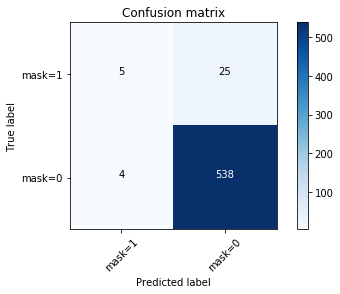

In [26]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['mask=1','mask=0'],normalize= False,  title='Confusion matrix')

# After SMOTE

In [9]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [10]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [11]:
y_pred = neigh.predict(X_test)
y_pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [12]:
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Test set Accuracy:  0.8636363636363636


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.92       542
           1       0.21      0.60      0.32        30

    accuracy                           0.86       572
   macro avg       0.59      0.74      0.62       572
weighted avg       0.94      0.86      0.89       572



Confusion matrix, without normalization
[[ 18  12]
 [ 66 476]]


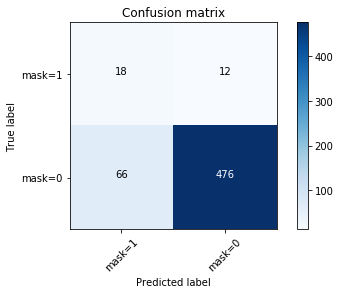

In [14]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['mask=1','mask=0'],normalize= False,  title='Confusion matrix')

In [17]:
knn_probs = neigh.predict_proba(X_test)

In [18]:
knn_probs = knn_probs[:, 1]

In [21]:
prec, rec, _ = precision_recall_curve(y_test, knn_probs)
f1 = f1_score(y_test, y_pred) 

In [22]:
au = auc(rec, prec)
print('Decision tree: f1=%.3f auc=%.3f' % (f1, au))

Decision tree: f1=0.316 auc=0.389


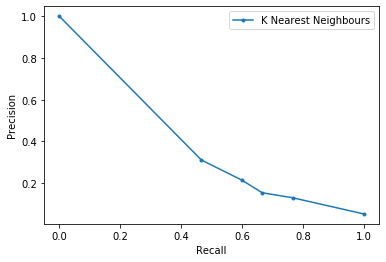

In [24]:
plt.plot(rec, prec, marker='.', label='K Nearest Neighbours')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()